# Simple Linear Regression

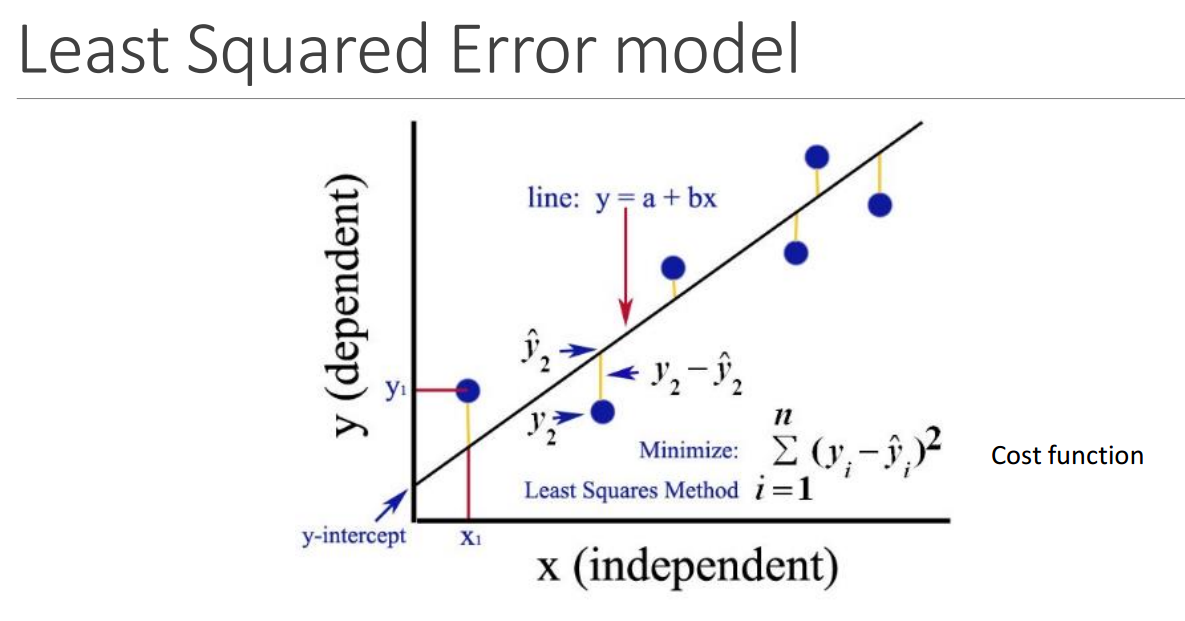

In [10]:
from warnings import filterwarnings
filterwarnings ("ignore")

# Step 1 : Read the Data Set

In [11]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Step 2 Always Perform Basic Data Quality Checks

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [17]:
df.nunique()

RND       49
ADMIN     50
MKT       48
STATE      3
PROFIT    50
dtype: int64

In [18]:
df.duplicated().sum()

0

# Step 3  Separate X(RND) And Y(PROFIT)


In [24]:
X = df[["RND"]] 
Y = df[["PROFIT"]]

In [25]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [26]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4 : Plot Graph

In [27]:


import seaborn as sns
import matplotlib.pyplot as plt

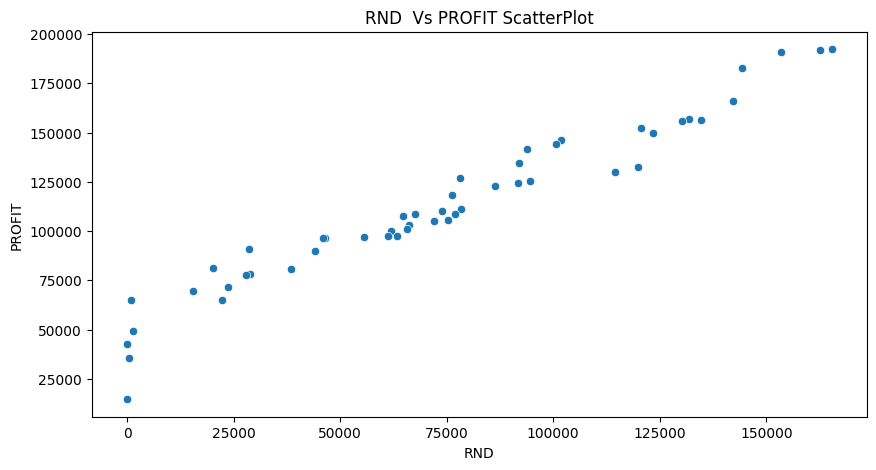

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df , x="RND",y="PROFIT")
plt.title("RND  Vs PROFIT ScatterPlot")
plt.show()

## step 5 : Build Liner Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

## Step 6 Evalute The Model

# Equation For 

## PROFIT_pred = 0.8542* RND + 49032.90

In [31]:
# R2 score
model.score(X,Y)

0.9465353160804393

In [32]:
#Estimated value of Profit
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [33]:
model.intercept_

array([49032.89914125])

In [34]:
model.coef_

array([[0.85429137]])

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,ypred)
print(f" Mean Squared Error (MSE) :{mse:.2f}")

 Mean Squared Error (MSE) :85120931.33


In [43]:
rmse =  mse**(1/2)
print(f' Root Mean Squared Error : {rmse:.2f}')

 Root Mean Squared Error : 9226.10


In [45]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,ypred)
print(f' Mean Absolute Error (mae) : {mae:.2f}')

 Mean Absolute Error (mae) : 6910.98


In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,  ypred)
print(f" Mean Absolute Percentage Error (mape): {mape*100:.2f}%")

 Mean Absolute Percentage Error (mape): 11.07%


In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,ypred)
print(f"R2 Square (r2) : {r2:.4f}")

R2 Square (r2) : 0.9465


### R 2 Score is is 0.94 > 0.8  it is  very good model

### Visiualizing Staright Line Fit

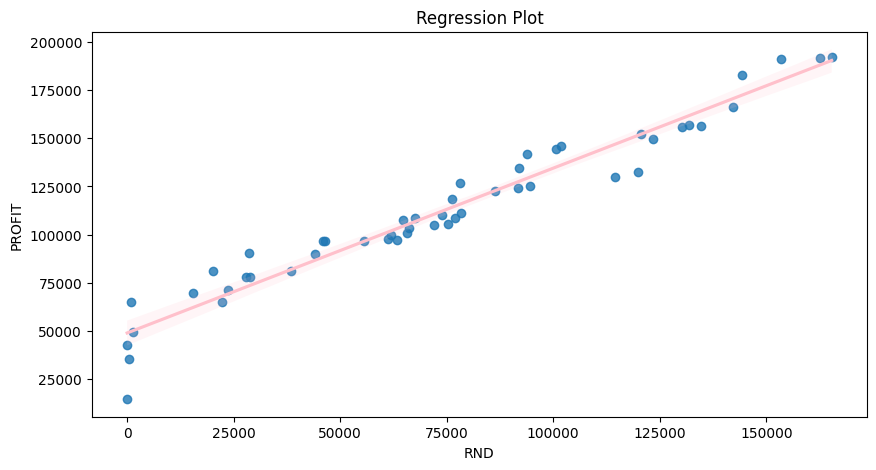

In [56]:
plt.figure(figsize=(10,5))
sns.regplot(data =  df  , x="RND" ,y= "PROFIT" ,line_kws={"color":"Pink"})
plt.title("Regression Plot")
plt.show()

## Predicting  out of sample Data

In [67]:
rnd = [[55000]]
profit_est = model.predict(rnd)[0][0]
print(f" Estimated Profit Is : {profit_est:.2f}")

 Estimated Profit Is : 96018.92


In [71]:
rnd = [[120000]]
profit_est = model.predict(rnd)[0][0]
print(f" Estimated Profit Is: {profit_est:.2f}")

 Estimated Profit Is: 151547.86


In [69]:
rnd = [[120000]]
profit_est = model.predict(rnd)[0][0]
print(f" Estimated Profit Is : {profit_est:.2f}")

 Estimated Profit Is : 151547.86
